## Collating the data into one data file

In [1]:
import numpy as np
import scipy.interpolate

from data_collator import generate_final_data
generate_final_data()

Level 60:root:Processing file: cleaned_data.csv
Level 60:root:Processing file: data.csv
Level 60:root:Processing file: final.csv
Level 60:root:Processing file: final_data.csv
Level 60:root:Processing file: January 08 2024.csv
Level 60:root:Processing file: January 09 2024.csv
Level 60:root:Processing file: January 10 2024.csv
Level 60:root:Processing file: January 11 2024.csv
Level 60:root:Processing file: January 12 2024.csv
Level 60:root:Processing file: January 13 2024.csv
Level 60:root:Processing file: January 14 2024.csv
Level 60:root:Processing file: January 15 2024.csv
Level 60:root:Processing file: January 16 2024.csv
Level 60:root:Processing file: January 17 2024.csv
Level 60:root:Processing file: January 18 2024.csv
Level 60:root:Processing file: January 20 2024.csv
Level 60:root:Processing file: January 23 2024.csv
Level 60:root:Processing file: January 24 2024.csv
Level 60:root:Processing file: January 25 2024.csv
Level 60:root:Processing file: January 08 2024.csv
Level 60:

In [2]:
import pandas as pd
from utils import *

In [3]:
data = pd.read_csv('data/data.csv')

In [4]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087H235,CAD,2.00,3.33%,Aaa,06/01/2028,94.55,94.77,08/01/2017,94.55
1,CA135087N266,CAD,1.50,3.27%,Aaa,12/01/2031,87.68,87.82,10/25/2021,87.68
2,CA135087L443,CAD,0.50,3.28%,Aaa,12/01/2030,83.08,83.17,10/05/2020,83.08
3,CA135087M847,CAD,1.25,3.61%,Aaa,03/01/2027,93.13,93.15,10/15/2021,93.13
4,CA135087M276,CAD,1.50,3.28%,Aaa,06/01/2031,88.36,88.50,4/26/2021,88.36
...,...,...,...,...,...,...,...,...,...,...
616,CA135087Q319,CAD,3.75,4.51%,Aaa,5/1/2025,98.90,99.32,2/10/2023,98.90
617,CA135087Q640,CAD,3.50,4.34%,Aaa,8/1/2025,98.76,98.87,5/12/2023,98.76
618,CA135087VH40,CAD,9.00,4.48%,Aaa,6/1/2025,105.73,106.16,8/2/1994,105.73
619,CA135087P816,CAD,3.00,3.96%,Aaa,4/1/2026,97.82,98.25,1/20/2023,97.82


In [5]:
data = data.loc[data.groupby('ISIN')['Ask'].idxmax()]

In [6]:
data.reset_index(inplace=True)

In [7]:
data.drop('index', axis=1, inplace=True)

In [8]:
data.head()

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087B451,CAD,2.50,5.04%,Aaa,6/1/2024,99.14,99.15,7/2/2013,99.14
1,CA135087D507,CAD,2.25,4.21%,Aaa,6/1/2025,97.36,97.49,6/30/2014,97.36
2,CA135087E679,CAD,1.50,3.70%,Aaa,6/1/2026,95.13,95.26,7/21/2015,95.13
3,CA135087F825,CAD,1.00,3.42%,Aaa,6/1/2027,92.35,92.68,8/3/2016,92.35
4,CA135087H235,CAD,2.00,3.26%,Aaa,6/1/2028,94.93,95.06,8/1/2017,94.93


In [9]:
data.to_csv('data/cleaned_data.csv', index=False)

In [10]:
data = pd.read_csv('data/cleaned_data.csv')

In [11]:
data.head()

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087B451,CAD,2.50,5.04%,Aaa,6/1/2024,99.14,99.15,7/2/2013,99.14
1,CA135087D507,CAD,2.25,4.21%,Aaa,6/1/2025,97.36,97.49,6/30/2014,97.36
2,CA135087E679,CAD,1.50,3.70%,Aaa,6/1/2026,95.13,95.26,7/21/2015,95.13
3,CA135087F825,CAD,1.00,3.42%,Aaa,6/1/2027,92.35,92.68,8/3/2016,92.35
4,CA135087H235,CAD,2.00,3.26%,Aaa,6/1/2028,94.93,95.06,8/1/2017,94.93


In [12]:
data['Maturity Date'] = pd.to_datetime(data['Maturity Date'], format='%m/%d/%Y')
data['Issue Date'] = pd.to_datetime(data['Issue Date'], format='%m/%d/%Y')

In [13]:
data = get_bonds(data)

D:\Assignment\MAT1856\Assignment\Assignment 1\utils.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Par Value"] = 1000
D:\Assignment\MAT1856\Assignment\Assignment 1\utils.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Coupon Payment"] = df["Par Value"] * df["Coupon"] / 200
D:\Assignment\MAT1856\Assignment\Assignment 1\utils.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [14]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity
0,CA135087B451,CAD,2.500,5.04%,Aaa,2024-06-01,99.14,99.15,2013-07-02,99.14,1000,12.500,101.290685,23.0,0.161598,117,3.900000
1,CA135087D507,CAD,2.250,4.21%,Aaa,2025-06-01,97.36,97.49,2014-06-30,97.36,1000,11.250,99.295616,23.0,0.155569,482,16.066667
2,CA135087E679,CAD,1.500,3.70%,Aaa,2026-06-01,95.13,95.26,2015-07-21,95.13,1000,7.500,96.420411,23.0,0.138394,847,28.233333
3,CA135087F825,CAD,1.000,3.42%,Aaa,2027-06-01,92.35,92.68,2016-08-03,92.35,1000,5.000,93.210274,22.0,0.131443,1212,40.400000
4,CA135087H235,CAD,2.000,3.26%,Aaa,2028-06-01,94.93,95.06,2017-08-01,94.93,1000,10.000,96.650548,22.0,0.154175,1578,52.600000
6,CA135087J546,CAD,2.250,4.86%,Aaa,2024-03-01,99.74,99.75,2018-10-05,99.74,1000,11.250,101.675616,11.0,0.272091,25,0.833333
7,CA135087J967,CAD,1.500,4.83%,Aaa,2024-09-01,98.07,98.08,2019-04-05,98.07,1000,7.500,99.360411,11.0,0.254620,209,6.966667
8,CA135087K528,CAD,1.250,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.250,97.745342,11.0,0.248408,390,13.000000
9,CA135087K940,CAD,0.500,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.500,94.920137,11.0,0.230807,574,19.133333
11,CA135087L518,CAD,0.250,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.250,93.235068,11.0,0.224626,755,25.166667


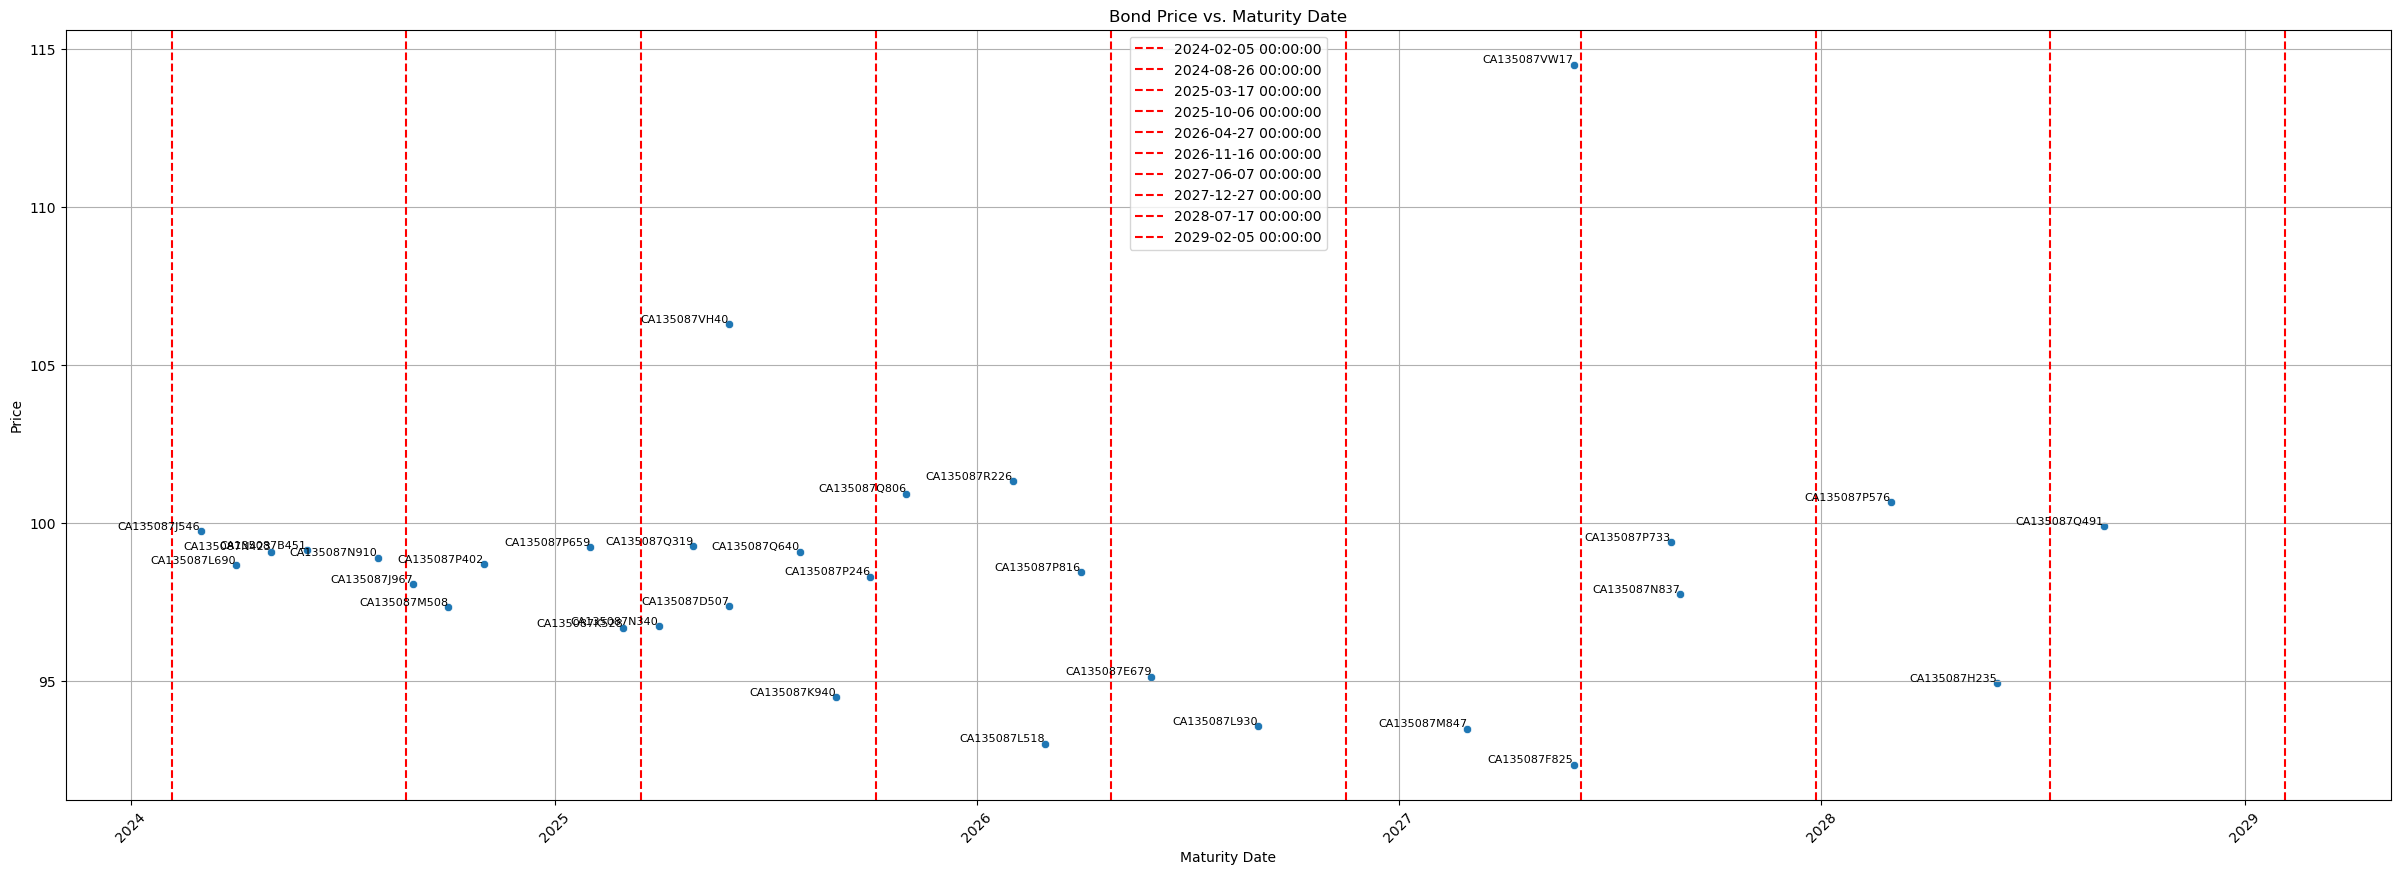

In [15]:
plot_bonds_price(data)

In [16]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity
0,CA135087B451,CAD,2.500,5.04%,Aaa,2024-06-01,99.14,99.15,2013-07-02,99.14,1000,12.500,101.290685,23.0,0.161598,117,3.900000
1,CA135087D507,CAD,2.250,4.21%,Aaa,2025-06-01,97.36,97.49,2014-06-30,97.36,1000,11.250,99.295616,23.0,0.155569,482,16.066667
2,CA135087E679,CAD,1.500,3.70%,Aaa,2026-06-01,95.13,95.26,2015-07-21,95.13,1000,7.500,96.420411,23.0,0.138394,847,28.233333
3,CA135087F825,CAD,1.000,3.42%,Aaa,2027-06-01,92.35,92.68,2016-08-03,92.35,1000,5.000,93.210274,22.0,0.131443,1212,40.400000
4,CA135087H235,CAD,2.000,3.26%,Aaa,2028-06-01,94.93,95.06,2017-08-01,94.93,1000,10.000,96.650548,22.0,0.154175,1578,52.600000
6,CA135087J546,CAD,2.250,4.86%,Aaa,2024-03-01,99.74,99.75,2018-10-05,99.74,1000,11.250,101.675616,11.0,0.272091,25,0.833333
7,CA135087J967,CAD,1.500,4.83%,Aaa,2024-09-01,98.07,98.08,2019-04-05,98.07,1000,7.500,99.360411,11.0,0.254620,209,6.966667
8,CA135087K528,CAD,1.250,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.250,97.745342,11.0,0.248408,390,13.000000
9,CA135087K940,CAD,0.500,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.500,94.920137,11.0,0.230807,574,19.133333
11,CA135087L518,CAD,0.250,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.250,93.235068,11.0,0.224626,755,25.166667


In [17]:
data["Maturing Month"] = data[("Maturity Date")].dt.month

In [18]:
data = zero_coupon_bonds(data)

D:\Assignment\MAT1856\Assignment\Assignment 1\utils.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_df["Zero_Yield"] = np.log((zero_df["Par Value"] + zero_df["Coupon Payment"]) / zero_df["Dirty Price"]) / \


In [19]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity,Maturing Month,Zero_Yield
0,CA135087D507,CAD,2.250,4.21%,Aaa,2025-06-01,97.36,97.49,2014-06-30,97.36,1000,11.250,99.295616,23.0,0.155569,482,16.066667,6,NaN
1,CA135087E679,CAD,1.500,3.70%,Aaa,2026-06-01,95.13,95.26,2015-07-21,95.13,1000,7.500,96.420411,23.0,0.138394,847,28.233333,6,NaN
2,CA135087F825,CAD,1.000,3.42%,Aaa,2027-06-01,92.35,92.68,2016-08-03,92.35,1000,5.000,93.210274,22.0,0.131443,1212,40.400000,6,NaN
3,CA135087H235,CAD,2.000,3.26%,Aaa,2028-06-01,94.93,95.06,2017-08-01,94.93,1000,10.000,96.650548,22.0,0.154175,1578,52.600000,6,NaN
4,CA135087J967,CAD,1.500,4.83%,Aaa,2024-09-01,98.07,98.08,2019-04-05,98.07,1000,7.500,99.360411,11.0,0.254620,209,6.966667,9,NaN
5,CA135087K528,CAD,1.250,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.250,97.745342,11.0,0.248408,390,13.000000,3,NaN
6,CA135087K940,CAD,0.500,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.500,94.920137,11.0,0.230807,574,19.133333,9,NaN
7,CA135087L518,CAD,0.250,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.250,93.235068,11.0,0.224626,755,25.166667,3,NaN
8,CA135087L930,CAD,1.000,3.61%,Aaa,2026-09-01,93.57,93.69,2021-04-16,93.57,1000,5.000,94.430274,11.0,0.241421,939,31.300000,9,NaN
9,CA135087M508,CAD,0.750,4.64%,Aaa,2024-10-01,97.33,97.34,2021-07-12,97.33,1000,3.750,97.975205,7.0,0.363946,239,7.966667,10,NaN


In [20]:
# data = data[data["Compounding Periods"]==11.0]
data = data.query("`Maturing Month`==3 or `Maturing Month`==9")
data = data.reset_index(drop=True)

In [21]:
data = data.sort_values(by=['Months to Maturity'])
data = data.reset_index(drop=True)

In [22]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity,Maturing Month,Zero_Yield
0,CA135087J546,CAD,2.25,4.86%,Aaa,2024-03-01,99.74,99.75,2018-10-05,99.74,1000,11.25,101.675616,11.0,0.272091,25,0.833333,3,2.756586
1,CA135087J967,CAD,1.50,4.83%,Aaa,2024-09-01,98.07,98.08,2019-04-05,98.07,1000,7.50,99.360411,11.0,0.254620,209,6.966667,9,NaN
2,CA135087K528,CAD,1.25,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.25,97.745342,11.0,0.248408,390,13.000000,3,NaN
3,CA135087K940,CAD,0.50,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.50,94.920137,11.0,0.230807,574,19.133333,9,NaN
4,CA135087L518,CAD,0.25,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.25,93.235068,11.0,0.224626,755,25.166667,3,NaN
5,CA135087L930,CAD,1.00,3.61%,Aaa,2026-09-01,93.57,93.69,2021-04-16,93.57,1000,5.00,94.430274,11.0,0.241421,939,31.300000,9,NaN
6,CA135087M847,CAD,1.25,3.48%,Aaa,2027-03-01,93.49,93.51,2021-10-15,93.49,1000,6.25,94.565342,11.0,0.246899,1120,37.333333,3,NaN
7,CA135087N837,CAD,2.75,3.41%,Aaa,2027-09-01,97.75,97.87,2022-05-13,97.75,1000,13.75,100.115753,11.0,0.282173,1304,43.466667,9,NaN
8,CA135087P576,CAD,3.50,3.32%,Aaa,2028-03-01,100.65,100.72,2022-10-21,100.65,1000,17.50,103.660959,11.0,0.300348,1486,49.533333,3,NaN
9,CA135087Q491,CAD,3.25,3.27%,Aaa,2028-09-01,99.90,99.99,2023-04-21,99.90,1000,16.25,102.695890,11.0,0.294392,1670,55.666667,9,NaN


In [23]:
data.to_csv("data/final.csv", index=False)

In [24]:
data["Years to Maturity"] = data["Months to Maturity"]/12

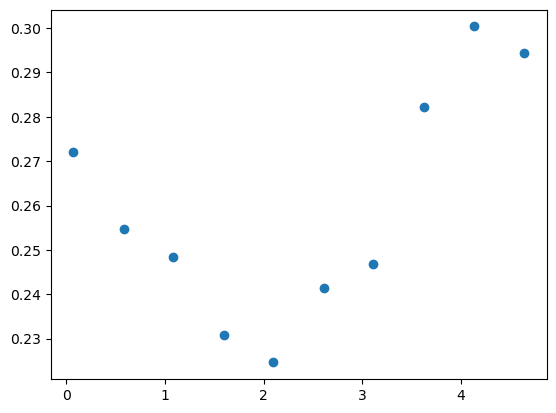

In [25]:
import matplotlib.pyplot as plt

plt.scatter(x="Years to Maturity", y="YTM", data=data)

In [26]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity,Maturing Month,Zero_Yield,Years to Maturity
0,CA135087J546,CAD,2.25,4.86%,Aaa,2024-03-01,99.74,99.75,2018-10-05,99.74,1000,11.25,101.675616,11.0,0.272091,25,0.833333,3,2.756586,0.069444
1,CA135087J967,CAD,1.50,4.83%,Aaa,2024-09-01,98.07,98.08,2019-04-05,98.07,1000,7.50,99.360411,11.0,0.254620,209,6.966667,9,NaN,0.580556
2,CA135087K528,CAD,1.25,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.25,97.745342,11.0,0.248408,390,13.000000,3,NaN,1.083333
3,CA135087K940,CAD,0.50,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.50,94.920137,11.0,0.230807,574,19.133333,9,NaN,1.594444
4,CA135087L518,CAD,0.25,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.25,93.235068,11.0,0.224626,755,25.166667,3,NaN,2.097222
5,CA135087L930,CAD,1.00,3.61%,Aaa,2026-09-01,93.57,93.69,2021-04-16,93.57,1000,5.00,94.430274,11.0,0.241421,939,31.300000,9,NaN,2.608333
6,CA135087M847,CAD,1.25,3.48%,Aaa,2027-03-01,93.49,93.51,2021-10-15,93.49,1000,6.25,94.565342,11.0,0.246899,1120,37.333333,3,NaN,3.111111
7,CA135087N837,CAD,2.75,3.41%,Aaa,2027-09-01,97.75,97.87,2022-05-13,97.75,1000,13.75,100.115753,11.0,0.282173,1304,43.466667,9,NaN,3.622222
8,CA135087P576,CAD,3.50,3.32%,Aaa,2028-03-01,100.65,100.72,2022-10-21,100.65,1000,17.50,103.660959,11.0,0.300348,1486,49.533333,3,NaN,4.127778
9,CA135087Q491,CAD,3.25,3.27%,Aaa,2028-09-01,99.90,99.99,2023-04-21,99.90,1000,16.25,102.695890,11.0,0.294392,1670,55.666667,9,NaN,4.638889


In [27]:
x = [0.5]
for i in range(9):
    x.append(x[-1]+0.5)

In [28]:
data["Speard"] = x

In [29]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,...,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity,Maturing Month,Zero_Yield,Years to Maturity,Speard
0,CA135087J546,CAD,2.25,4.86%,Aaa,2024-03-01,99.74,99.75,2018-10-05,99.74,...,11.25,101.675616,11.0,0.272091,25,0.833333,3,2.756586,0.069444,0.5
1,CA135087J967,CAD,1.50,4.83%,Aaa,2024-09-01,98.07,98.08,2019-04-05,98.07,...,7.50,99.360411,11.0,0.254620,209,6.966667,9,NaN,0.580556,1.0
2,CA135087K528,CAD,1.25,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,...,6.25,97.745342,11.0,0.248408,390,13.000000,3,NaN,1.083333,1.5
3,CA135087K940,CAD,0.50,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,...,2.50,94.920137,11.0,0.230807,574,19.133333,9,NaN,1.594444,2.0
4,CA135087L518,CAD,0.25,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,...,1.25,93.235068,11.0,0.224626,755,25.166667,3,NaN,2.097222,2.5
5,CA135087L930,CAD,1.00,3.61%,Aaa,2026-09-01,93.57,93.69,2021-04-16,93.57,...,5.00,94.430274,11.0,0.241421,939,31.300000,9,NaN,2.608333,3.0
6,CA135087M847,CAD,1.25,3.48%,Aaa,2027-03-01,93.49,93.51,2021-10-15,93.49,...,6.25,94.565342,11.0,0.246899,1120,37.333333,3,NaN,3.111111,3.5
7,CA135087N837,CAD,2.75,3.41%,Aaa,2027-09-01,97.75,97.87,2022-05-13,97.75,...,13.75,100.115753,11.0,0.282173,1304,43.466667,9,NaN,3.622222,4.0
8,CA135087P576,CAD,3.50,3.32%,Aaa,2028-03-01,100.65,100.72,2022-10-21,100.65,...,17.50,103.660959,11.0,0.300348,1486,49.533333,3,NaN,4.127778,4.5
9,CA135087Q491,CAD,3.25,3.27%,Aaa,2028-09-01,99.90,99.99,2023-04-21,99.90,...,16.25,102.695890,11.0,0.294392,1670,55.666667,9,NaN,4.638889,5.0


In [30]:
from Bonds import Bonds
bonds = Bonds(data)

D:\Assignment\MAT1856\Assignment\Assignment 1\Bonds.py:88: RuntimeWarning: invalid value encountered in scalar divide
  self.forward_rates[1][day] = (self._yield[12+day]*(12+day) - year_1*12)/day


In [31]:
bonds._bonds

[Bond(isin='CA135087J546', coupon=2.25, price=99.74, par=101.125, issue=Timestamp('2018-10-05 00:00:00'), maturity=Timestamp('2024-03-01 00:00:00'), coupon_payment=1.13765625, number_days_last_payment=1, maturity_months=5, dirty_price=99.74624999999999, payments=[5]),
 Bond(isin='CA135087J967', coupon=1.5, price=98.07, par=100.75, issue=Timestamp('2019-04-05 00:00:00'), maturity=Timestamp('2024-09-01 00:00:00'), coupon_payment=0.755625, number_days_last_payment=1, maturity_months=11, dirty_price=98.07416666666666, payments=[5, 11]),
 Bond(isin='CA135087K528', coupon=1.25, price=96.67, par=100.625, issue=Timestamp('2019-10-11 00:00:00'), maturity=Timestamp('2025-03-01 00:00:00'), coupon_payment=0.62890625, number_days_last_payment=1, maturity_months=17, dirty_price=96.67347222222223, payments=[5, 11, 17]),
 Bond(isin='CA135087K940', coupon=0.5, price=94.49, par=100.25, issue=Timestamp('2020-04-03 00:00:00'), maturity=Timestamp('2025-09-01 00:00:00'), coupon_payment=0.250625, number_days

In [32]:
bonds._yield

{0: 0,
 5: 0.007447264351578402,
 11: 0.02679663584689171,
 17: 0.0605648394871188,
 23: 0.11505136180481851,
 29: 0.17323666005114152,
 35: 0.20941550714233564,
 41: 0.22964414493197002,
 47: 0.14125557057444657,
 53: 0.06612708680540781,
 59: 0.08372846423994917,
 1: 0.0011439928583597465,
 2: 0.002287985716719493,
 3: 0.00343197857507924,
 4: 0.004575971433438986,
 6: 0.010318557269717818,
 7: 0.013189850187857234,
 8: 0.01606114310599665,
 9: 0.018932436024136065,
 10: 0.02180372894227548,
 12: 0.031789542751507936,
 13: 0.036782449656124164,
 14: 0.04177535656074039,
 15: 0.04676826346535662,
 16: 0.05176117036997285,
 18: 0.06936850860426474,
 19: 0.07817217772141069,
 20: 0.08697584683855664,
 21: 0.09577951595570257,
 22: 0.1045831850728485,
 24: 0.12551953853678852,
 25: 0.13598771526875852,
 26: 0.14645589200072853,
 27: 0.15692406873269854,
 28: 0.16739224546466858,
 30: 0.17908107463761447,
 31: 0.1849254892240874,
 32: 0.19076990381056036,
 33: 0.19661431839703328,
 34: 0.

<Axes: >

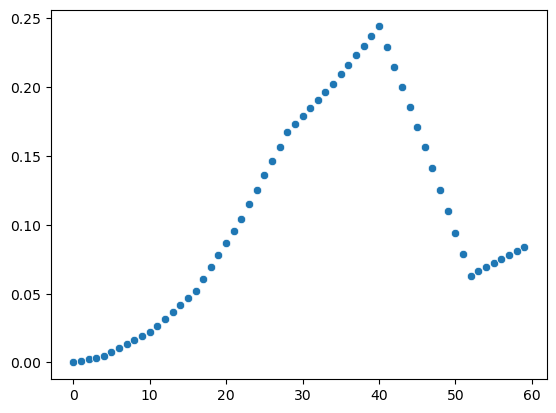

In [33]:
sns.scatterplot(x=bonds._yield.keys(), y=bonds._yield.values())

In [35]:
bonds.forward_rates[1]

[nan,
 0.09669733251151891,
 0.10169023941613514,
 0.10668314632075138,
 0.11167605322536761,
 0.12962555165258488,
 0.14452644030977838,
 0.157685266241244,
 0.1697553029691297,
 0.18109948022796207,
 0.19193555585845717,
 0.2058824371357028,
 0.21924953432206906,
 0.23217064374622062,
 0.24474133421434616,
 0.25703168951765104,
 0.26909427249953904,
 0.27308168402735344,
 0.27727542922835213,
 0.281642929101506,
 0.2861581204459918,
 0.2907999044801906,
 0.29555101856459615,
 0.30208992334624574,
 0.30866365057599365,
 0.3152680215600681,
 0.3218995004806622,
 0.3285550753448292,
 0.3352321644443293,
 0.3115150147997474,
 0.2884086595978369,
 0.2658539896989842,
 0.24379928460602776,
 0.222199092972977,
 0.2010133106710167,
 0.1787867801137398,
 0.1569277007354806,
 0.13540627919739975,
 0.11419585830158852,
 0.09327251492171837,
 0.0726147182440938,
 0.07617709969923217,
 0.0797095374139238,
 0.08321412048633936,
 0.08669274809663409,
 0.09014715060894937,
 0.09357890792097949,
 0.0